In [1]:
import os
import random 

%matplotlib inline
import matplotlib.pyplot as plt

import cv2

# Functions

In [2]:
IMG_PATH = "./data/aug/images/1_MWII-S03-ANNOUNCEMENT-036-Bjpeg_jpg.rf.1c9dea32bc374ce4864522184af45b6e.jpg"
BB_PATH = "./data/aug/labels/1_MWII-S03-ANNOUNCEMENT-036-Bjpeg_jpg.rf.1c9dea32bc374ce4864522184af45b6e.txt"

In [3]:
def read_img(img_path:str):
    return cv2.imread(img_path)

In [4]:
def read_bb(bb_file_path:str):
    with open(bb_file_path, "r") as file:
        return file.readlines()

In [5]:
def viz(img_path:str, bb_file_path:str):
    color = [random.randint(0, 255) for _ in range(3)]
    
    img = read_img(img_path)
    bb_info_arr = read_bb(bb_file_path)

    H, W, _ = img.shape
    
    for bb in bb_info_arr:
        bb_coord_arr = bb.split()
        print(bb_coord_arr)
        _, x_center, y_center, w, h = bb_coord_arr
        x_center, y_center, w, h = float(x_center), float(y_center), float(w), float(h)
        
        w = float(w*W)
        h = float(h*H)

        x = float(x_center*W - (w/2))
        y = float(y_center*H - (h/2))

        x1 = round(x)
        y1 = round(y)
        x2 = round(x+w)
        y2 = round(y+h)
        
        cv2.rectangle(img, (x1,y1), (x2,y2), color, cv2.LINE_4)
        return cv2.circle(img, (round(x_center*W), round(y_center*H)), radius=0, color=(255,0,0), thickness=0)

In [6]:
def aug(img_path:str, bb_file_path:str, augmentation:int=0.20):
    
    img = read_img(img_path)
    bb_info_arr = read_bb(bb_file_path)
    
    H, W, _ = img.shape
    
    for bb in bb_info_arr:
        bb_coord_arr = bb.split()
        bb_class, x_center, y_center, w, h = bb_coord_arr
        x_center, y_center, w, h = float(x_center), float(y_center), float(w), float(h)
        
        if x_center + w + augmentation <= W:
            w = w+augmentation
        else:
            w = W
            
        if y_center + h + augmentation <= H:
            h = h+augmentation
        else:
            h = H

        with open(bb_file_path, "w") as file:
            file.write(f"{bb_class} {x_center} {y_center} {w} {h}")
   

# Example Augmentation difference

['0', '0.240625', '0.56484375', '0.3375', '0.421875']
['0', '0.29296875', '0.29921875', '0.5734375', '0.48125']
['0', '0.5640625', '0.4828125', '0.346875', '0.39765625']
['0', '0.76328125', '0.62890625', '0.38671875', '0.74140625']
['0', '0.52421875', '0.56640625', '0.17578125', '0.50078125']
['0', '0.42734375', '0.396875', '0.14765625', '0.1421875']


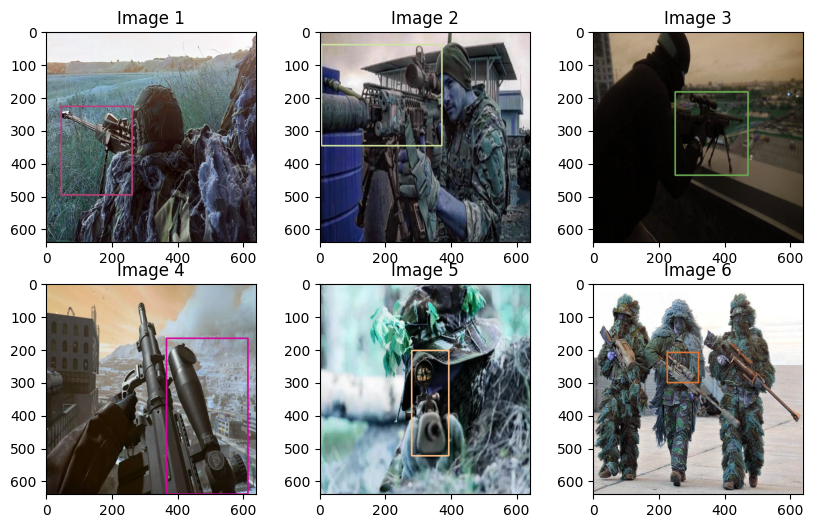

In [7]:
IMG = os.listdir("./data/aug/images/")
BB = os.listdir("./data/aug/labels/")

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
imgs = []

for f in BB:
    imgs.append(viz("./data/raw/images/"+f[:-3]+"jpg", "./data/raw/labels/"+f))
    
for i, ax in enumerate(axes.ravel()):
    ax.imshow(imgs[i], cmap='viridis')
    ax.set_title(f'Image {i + 1}')
    
plt.show()
    

['0', '0.240625', '0.56484375', '1.1375', '1.2218749999999998']
['0', '0.29296875', '0.29921875', '1.3734374999999999', '1.28125']
['0', '0.5640625', '0.4828125', '1.1468749999999999', '1.1976562499999999']
['0', '0.76328125', '0.62890625', '1.1867187499999998', '1.5414062499999999']
['0', '0.52421875', '0.56640625', '0.97578125', '1.3007812499999998']
['0', '0.64296875', '0.6171875', '0.97578125', '0.97265625']


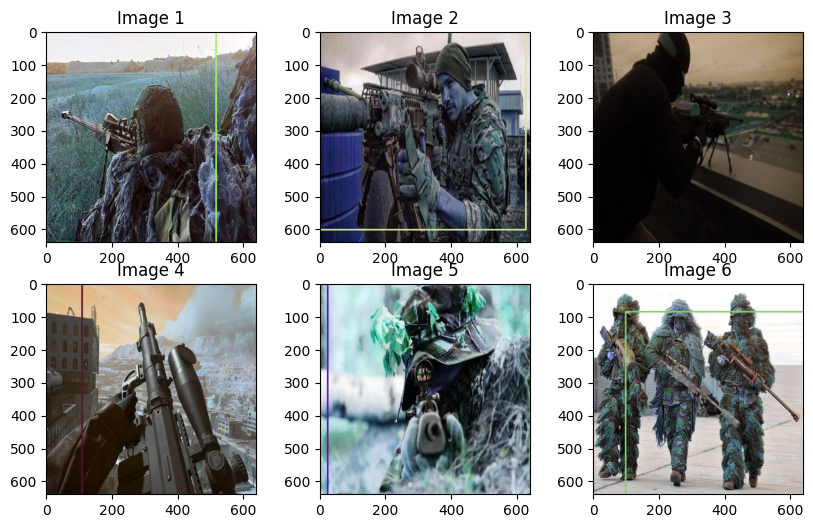

In [8]:
IMG = os.listdir("./data/aug/images/")
BB = os.listdir("./data/aug/labels/")

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
imgs = []

for f in BB:
    aug("./data/aug/images/"+f[:-3]+"jpg", "./data/aug/labels/"+f)
    imgs.append(viz("./data/aug/images/"+f[:-3]+"jpg", "./data/aug/labels/"+f))
    
for i, ax in enumerate(axes.ravel()):
    ax.imshow(imgs[i], cmap='viridis')
    ax.set_title(f'Image {i + 1}')
    
plt.show()

# Testing Impact of Augmented bounding box

In [9]:
num_imgs = 100

%run ./yolo_training_setup.ipynb
select_imgs(num_imgs)

for d in ["train", "valid", "test"]: 
    files = os.listdir(f"./data/aug/{d}/labels")
    for f in files:
        aug(f"./data/aug/{d}/images/"+f[:-3]+"jpg", f"./data/aug/{d}/labels/"+f)

res_train, res_val = train(str(num_imgs) +"_imgs")

mAP50_train = res_train.results_dict["metrics/mAP50(B)"]
mAP50_95_train = res_train.results_dict["metrics/mAP50-95(B)"]

mAP50_val = res_val.results_dict["metrics/mAP50(B)"]
mAP50_95_val = res_val.results_dict["metrics/mAP50-95(B)"]

with open('./excel/aug_log.txt', "a") as f:
    f.write(f"{num_imgs} {mAP50_train} {mAP50_95_train} {mAP50_val} {mAP50_95_val} \n")

restartkernel()

True


New https://pypi.org/project/ultralytics/8.0.202 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.200  Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 10239MiB)
engine\trainer: task=detect, mode=train, model=./yolov8n.pt, data=E:\OU\master\rm\pre_shot_sniper_detection\data\data_aug.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=augmented, name=100_imgs3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fa